In [32]:
import pandas as pd
import numpy as np

numNames = open("../db/names.csv", "r").read().split("\n").__len__()
def get_opt_k(m: int) -> int:
    return np.round(np.log(2)*m/numNames, 0).__int__()

def get_false_positive_rate(m: int, k: int) -> float:
    return (1 - np.exp(-(k*numNames)/m))**k

for M in [100_000, 250_000, 500_000, 750_000, 1_000_000]:
    k = get_opt_k(M)
    fp_rate = get_false_positive_rate(M, k)
    print(f"Probabilidad falso positivo, {M=:9,}, {k=:2}: {fp_rate*100:6.3f}%")

Probabilidad falso positivo, M=  100,000, k= 1: 60.894%
Probabilidad falso positivo, M=  250,000, k= 2: 27.895%
Probabilidad falso positivo, M=  500,000, k= 4:  7.781%
Probabilidad falso positivo, M=  750,000, k= 6:  2.171%
Probabilidad falso positivo, M=1,000,000, k= 7:  0.602%


In [54]:
import pandas as pd

def get_fp_rate_df(df: pd.DataFrame, M: int, k: int) -> float:
    df = df[df["M"]  == M]
    df = df[df["k"]  == k]
    df = df[df["DB"] == "BloomFilter"]

    fp = 0      # FP
    total = 0   # FP + TN   
    for found, found_in_filter, N, p in zip(df["found"], df["foundInFilter"], df["N"], df["p"]):
        fp += (found_in_filter - found) / N   # Aporte de cada test
        total += (1-p)
    
    fp_rate = fp / total
    return fp_rate * 100

df = pd.read_csv("results.csv")


for M in [100_000, 250_000, 500_000, 750_000, 1_000_000]:
    k = get_opt_k(M)
    print(f"Proporción de falsos positivos, {M=:9,}, {k=}: {get_fp_rate_df(df, M, k):6.3f}%")


Proporción de falsos positivos, M=  100,000, k=1: 60.589%
Proporción de falsos positivos, M=  250,000, k=2: 28.041%
Proporción de falsos positivos, M=  500,000, k=4:  7.846%
Proporción de falsos positivos, M=  750,000, k=6:  2.289%
Proporción de falsos positivos, M=1,000,000, k=7:  0.928%


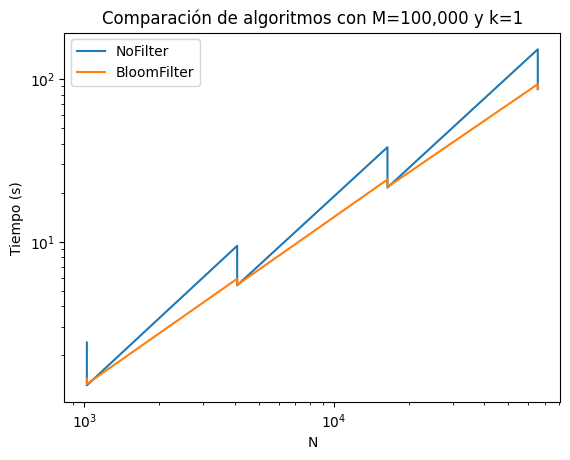

In [58]:
import matplotlib.pyplot as plt

def cmp_graph(M: int, k: int) -> None:
    df = pd.read_csv("results.csv")
    df = df[df["M"] == M]
    df = df[df["k"] == k]

    fig, ax = plt.subplots()
    ax.set_title(f"Comparación de algoritmos con {M=:,} y {k=}")
    ax.set_xlabel("N")
    ax.set_ylabel("Tiempo (s)")

    for db in df["DB"].unique():
        db_df = df[df["DB"] == db]
        ax.plot(db_df["N"], db_df["Time"], label=db)

    ax.legend()
    plt.show()

cmp_graph(100_000, 1)

